<a href="https://colab.research.google.com/github/petewarden/pico_colabs/blob/main/Building_Person_Detection_for_the_Arducam_Pico4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Person Detection for the Arducam Pico4ML

*By [Pete Warden](https://twitter.com/petewarden), peteward@stanford.edu*

This notebook demonstrates how to compile and deploy some programs for [the Arducam Pico4ML board](), which is based on a Raspberry Pi Pico RP2040 microcontroller, but adds sensors and a screen to make it easier to use for TinyML development. A lot of the setup steps are the same as for [the blink Pico example](https://colab.research.google.com/github/petewarden/pico_colabs/blob/main/Building_Blink_for_the_Raspberry_Pi_Pico.ipynb) so I don't go into as much detail on the basics.

## Install the SDK and Examples

This is similar to the blink notebook, but instead of installing the example code for the standalone Pico board, we fetch [the Arducam repository of sample code]( https://github.com/ArduCAM/pico-tflmicro).

In [ ]:
!mkdir pico
%cd pico
!git clone -b master https://github.com/raspberrypi/pico-sdk.git
%cd pico-sdk
!git submodule update --init
%cd ..
!git clone --recursive  https://github.com/ArduCAM/pico-tflmicro

## Install the Toolchain

In [ ]:
!sudo apt update
!sudo apt install cmake gcc-arm-none-eabi libnewlib-arm-none-eabi build-essential libstdc++-arm-none-eabi-newlib

## Set up the Person Detection Build Files

Here we're going to configure the person detection example, in a similar way to how we set up the blink build files. Because the folder structure of the Arducam repository is a little different from the Raspberry Pi examples, we have to set the `PICO_SDK_PATH` a bit differently though.

In [ ]:
%env PICO_SDK_PATH=/content/pico/pico-sdk
%cd /content/pico/pico-tflmicro
!mkdir build 
%cd build 
!cmake ..

## Compile the Person Detection Example

The person detector requires [the TensorFlow Lite Micro library](https://github.com/tensorflow/tflite-micro) to run machine learning models, and this is quite a large framework so the compilation process may take ten minutes or so. It can also use a lot of RAM, so to prevent the Colab runtime from crashing we'll only compile a few files in parallel, with the `-j4` option to `make`.

In [ ]:
%cd /content/pico/pico-tflmicro/build
!make -j4

## Load and Run the Person Detector Executable

You should now be able to find the person detection binary in `/content/pico/pico-tflmicro/build/examples/person_detection/person_detection_int8.uf2`. Press the `bootsel` button on the board, plug it into the USB socket so that the mass storage drive appears in the file system, and copy the binary over. After the board reboots, you should see the output of the camera in the board's display, together with a percentage score at the bottom. If you hold the board with the USB connector at the bottom, and point the camera to a person, you should see the percentage rise from a low value to much higher, indicating that the person detection model is working.

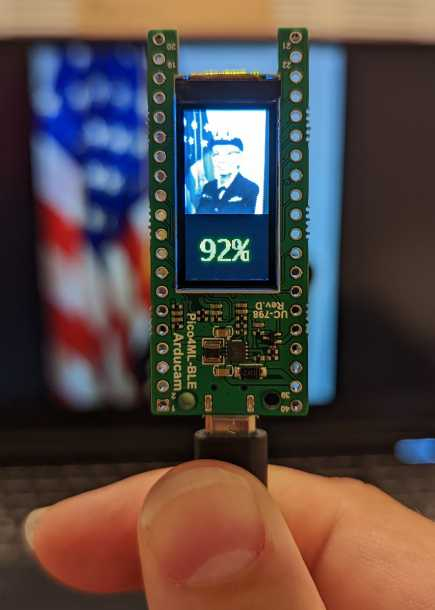